In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [38]:
df = pd.read_csv('Fraud.csv')

In [39]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [40]:
df.drop(columns='nameOrig nameDest'.split(), inplace=True)

In [41]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [42]:
df = pd.get_dummies(df, columns='type'.split(), drop_first=True)
df.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [43]:
df.shape

(6362620, 12)

In [44]:
df2 = pd.concat([
                df[df['isFraud'] == 0].sample(10000),
                df[df['isFraud'] == 1]
                ])

In [45]:
X = df2.drop(columns='isFraud'.split())
y = df2['isFraud']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [47]:
rfc = RandomForestClassifier(n_jobs=-1, verbose=3)

In [48]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100building tree 19 of 100

building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(n_jobs=-1, verbose=3)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
y_hat = rfc.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


# Factors showing the efficiency of the model

In [51]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3046
           1       0.98      1.00      0.99      2418

    accuracy                           0.99      5464
   macro avg       0.99      0.99      0.99      5464
weighted avg       0.99      0.99      0.99      5464



In [53]:
print(accuracy_score(y_test,y_hat))


0.9910322108345534


In [54]:
print(confusion_matrix(y_test, y_hat))

[[3009   37]
 [  12 2406]]


Box Plot for the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x252c773da00>,
 'caps': [<matplotlib.lines.Line2D at 0x252c773dfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x252c773d730>,
 'medians': [<matplotlib.lines.Line2D at 0x252c775c580>,
 'fliers': [<matplotlib.lines.Line2D at 0x252c775c850>,
 'means': []}

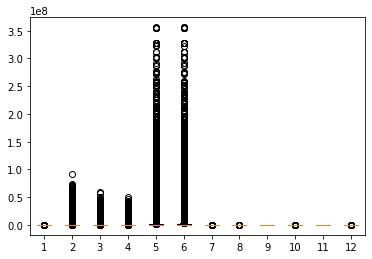

In [18]:
plt.boxplot(df)

In [19]:
plt.show()